## Publishing

We're still in our working directory:

In [1]:
import os
top_dir = os.getcwd()
git_dir = os.path.join(top_dir, 'learning_git')
working_dir=os.path.join(git_dir, 'git_example')
os.chdir(working_dir)
working_dir

'/Users/jamespjh/devel/rsdt/rsd-engineeringcourse/ch02git/learning_git/git_example'

### Sharing your work

So far, all our work has been on our own computer. But a big part of the point of version control is keeping your work safe, on remote servers. Another part is making it easy to share your work with the world In this example, we'll be using the "GitHub" cloud repository to store and publish our work. 

If you have not done so already, you should create an account on GitHub: go to [https://github.com/](https://github.com/), fill in a username and password, and click on "sign up for free". 

### Creating a repository

Ok, let's create a repository to store our work. Hit "new repository" on the right of the github home screen, or click [here](https://github.com/new). 

Fill in a short name, and a description. Choose a "public" repository. Don't choose to add a Readme.

### Paying for GitHub

For this software carpentry course, you should use public repositories in your personal account for your example work: it's good to share! GitHub is free for open source, but in general, charges a fee if you want to keep your work private. 

In the future, you might want to keep your work on GitHub private. 

Students can get free private repositories on GitHub, by going to [https://github.com/edu] and filling in a form. 

UCL pays for private GitHub repositories for UCL research groups: you can find the service details on our [web page](../../infrastructure/github.html).

### Adding a new remote to your repository

Instructions will appear, once you've created the repository, as to how to add this new "remote" server to your repository, in the lower box on the screen. Mine say:

In [2]:
%%bash
git remote add origin git@github.com:UCL/github-example.git

In [3]:
%%bash
git push -uf origin master # I have an extra `f` switch here. You should copy the instructions from YOUR repository.

Branch master set up to track remote branch master from origin.


To git@github.com:UCL/github-example.git
 + 8baf9ef...4d94051 master -> master (forced update)


### Remotes

The first command sets up the server as a new `remote`, called `origin`. 

Git, unlike some earlier version control systems is a "distributed" version control system, which means you can work with multiple remote servers. 

Usually, commands that work with remotes allow you to specify the remote to use, but assume the `origin` remote if you don't. 

Here, `git push` will push your whole history onto the server, and now you'll be able to see it on the internet! Refresh your web browser where the instructions were, and you'll see your repository!

Let's add these commands to our diagram:

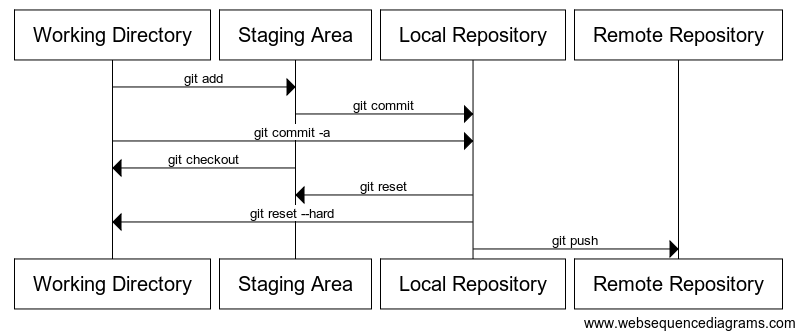

In [4]:
message="""
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Working Directory -> Local Repository : git commit -a
Staging Area -> Working Directory : git checkout
Local Repository -> Staging Area : git reset
Local Repository -> Working Directory: git reset --hard
Local Repository -> Remote Repository : git push
"""
from wsd import wsd
%matplotlib inline
wsd(message)

### Playing with GitHub

Take a few moments to click around and work your way through the GitHub interface. Try clicking on 'index.md' to see the content of the file: notice how the markdown renders prettily.

Click on "commits" near the top of the screen, to see all the changes you've made. Click on the commit number next to the right of a change, to see what changes it includes: removals are shown in red, and additions in green.

## Working with multiple files

### Some new content

So far, we've only worked with one file. Let's add another:

``` bash
vim lakeland.md
```

In [5]:
%%writefile lakeland.md
Lakeland  
========   
  
Cumbria has some pretty hills, and lakes too.  

Writing lakeland.md


In [6]:
cat lakeland.md

Lakeland  
  
Cumbria has some pretty hills, and lakes too.  

### Git will not by default commit your new file

In [7]:
%%bash
git commit -am "Try to add Lakeland"

On branch master
Your branch is up-to-date with 'origin/master'.
Untracked files:
	lakeland.md
	wsd.py
	wsd.pyc

nothing added to commit but untracked files present


This didn't do anything, because we've not told git to track the new file yet.

### Tell git about the new file

In [8]:
%%bash
git add lakeland.md
git commit -am "Add lakeland"

[master 83cab4a] Add lakeland
 1 file changed, 4 insertions(+)
 create mode 100644 lakeland.md


Ok, now we have added the change about Cumbria to the file. Let's publish it to the origin repository.

In [9]:
%%bash
git push

To git@github.com:UCL/github-example.git
   4d94051..83cab4a  master -> master


Visit GitHub, and notice this change is on your repository on the server. We could have said `git push origin` to specify the remote to use, but origin is the default.

## Changing two files at once

What if we change both files?

In [10]:
%%writefile lakeland.md
Lakeland  
========   
  
Cumbria has some pretty hills, and lakes too

Mountains:
* Helvellyn

Overwriting lakeland.md


In [11]:
%%writefile index.md
Mountains and Lakes in the UK   
===================   
Engerland is not very mountainous.
But has some tall hills, and maybe a mountain or two depending on your definition.

Overwriting index.md


In [12]:
%%bash
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   index.md
	modified:   lakeland.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	wsd.py
	wsd.pyc

no changes added to commit (use "git add" and/or "git commit -a")


These changes should really be separate commits. We can do this with careful use of git add, to **stage** first one commit, then the other.

In [13]:
%%bash
git add index.md
git commit -m "Include lakes in the scope"

[master 2e6617b] Include lakes in the scope
 1 file changed, 2 insertions(+), 2 deletions(-)


Because we "staged" only index.md, the changes to lakeland.md were not included in that commit.

In [14]:
%%bash
git commit -am "Add Helvellyn"

[master 45054b4] Add Helvellyn
 1 file changed, 4 insertions(+), 1 deletion(-)


In [16]:
%%bash
git log --oneline

45054b4 Add Helvellyn
2e6617b Include lakes in the scope
83cab4a Add lakeland
4d94051 Revert "Add a lie about a mountain"
0db7b4f Change title
47ea014 Add a lie about a mountain
8aff924 First commit of discourse on UK topography


In [17]:
%%bash
git push

To git@github.com:UCL/github-example.git
   83cab4a..45054b4  master -> master


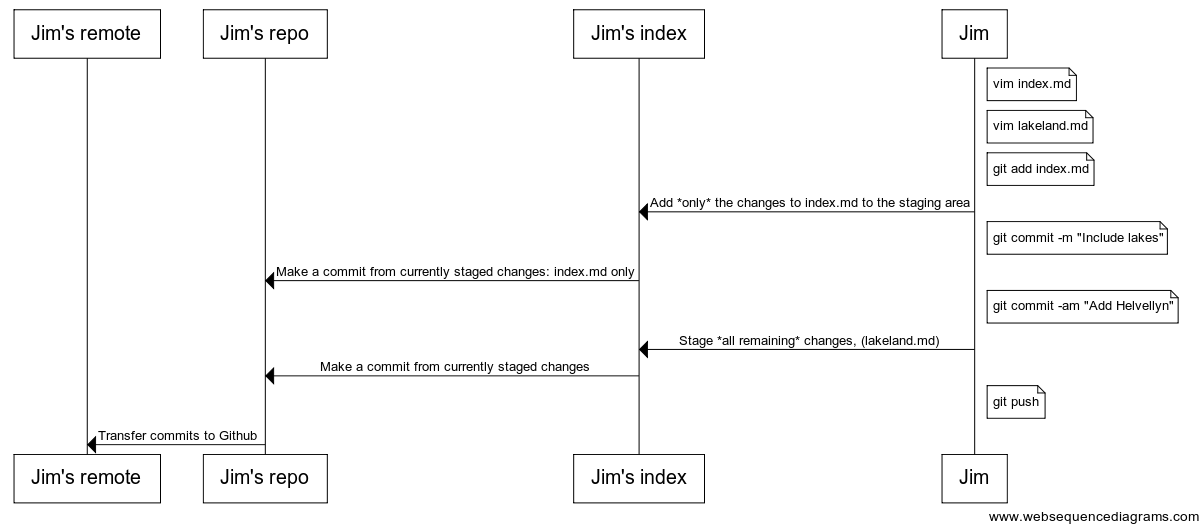

In [18]:
message="""
participant "Jim's remote" as M
participant "Jim's repo" as R
participant "Jim's index" as I
participant Jim as J

note right of J: vim index.md
note right of J: vim lakeland.md

note right of J: git add index.md
J->I: Add *only* the changes to index.md to the staging area

note right of J: git commit -m "Include lakes"
I->R: Make a commit from currently staged changes: index.md only

note right of J: git commit -am "Add Helvellyn"
J->I: Stage *all remaining* changes, (lakeland.md)
I->R: Make a commit from currently staged changes

note right of J: git push
R->M: Transfer commits to Github
"""
wsd(message)